**Pavan Pyla**
 # Fraud Provider Detection In Health Care using several Classification Tecniques

In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [3]:
Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [4]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [5]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [6]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

In [7]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,...,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,...,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,...,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,...,1,2,1,1,2,2,4000,1068,0,0


In [8]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [9]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [10]:
df=df.drop(['BeneID','ClaimID'],axis=1)

In [11]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,...,1,1,2,2,2,5000,1068,0,0,No


In [12]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [13]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [14]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,DeductibleAmtPaid,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,0.0,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,1068.0,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,1068.0,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,1068.0,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,1068.0,...,1,1,2,2,2,5000,1068,0,0,No


In [15]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [16]:
data=df

In [17]:
df = pd.DataFrame()
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [18]:

startdate= pd.to_datetime( data["AdmissionDt"] )
enddate= pd.to_datetime( data["DischargeDt"] )

pe = ( enddate - startdate).dt.days
df["Hperiod"] = pe

In [19]:
df['claim']=data['InscClaimAmtReimbursed']

In [20]:
startdate= pd.to_datetime( data["ClaimStartDt"] )
enddate= pd.to_datetime( data["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p

In [21]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=data.apply(physician_same,axis=1)

In [22]:
df['phy_same']=phy_same

In [23]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

data['PotentialFraud']= label_encoder.fit_transform(data['PotentialFraud'])
  
data['PotentialFraud'].unique()

array([1, 0])

In [24]:
data['PotentialFraud'].sum()

212796

In [25]:
data['Gender']

0         2
1         1
2         1
3         1
4         1
         ..
558206    2
558207    1
558208    1
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [26]:
df["Gender"]=data["Gender"].replace({2:0})

In [27]:
df

,Hperiod,claim,period,phy_same,Gender
0,NaN,30,0,3,0
1,NaN,40,0,3,1
2,NaN,200,0,3,1
3,NaN,20,0,3,1
4,NaN,40,0,3,1
...,...,...,...,...,...
558206,5.0,0,5,3,0
558207,3.0,4000,3,3,1
558208,8.0,8000,8,3,1
558209,3.0,5000,3,3,0


In [28]:
df["RenalDiseaseIndicator"]=data["RenalDiseaseIndicator"].replace({"Y":1})

In [29]:
birthdate=pd.to_datetime(data["DOB"])
enddate=pd.to_datetime(data["DOD"])

# cheack whether the patient dead or alive
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period
df["alife"]=alive

In [30]:
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [31]:
from pandas.api.types import is_numeric_dtype

In [32]:
for i in df.columns:
  print(f"{i }:",is_numeric_dtype(df
[i]))

Hperiod: True
claim: True
period: True
phy_same: True
Gender: True
RenalDiseaseIndicator: False
age: True
alife: True


In [33]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','PotentialFraud']

In [34]:
df['Provider']= label_encoder.fit_transform(data['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [35]:
for i in columns:
  df[i]=data[i]

In [36]:
df['Provider']=df['Provider']

In [37]:
df

,Hperiod,claim,period,phy_same,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,NaN,30,0,3,0,0,75,1,4004,12,...,2,2,2,2,2,2,30,50,0.0,1
1,NaN,40,0,3,1,0,89,1,4004,12,...,2,2,2,1,1,2,1810,760,0.0,1
2,NaN,200,0,3,1,0,89,1,4004,12,...,2,2,2,1,1,2,1810,760,0.0,1
3,NaN,20,0,3,1,0,89,1,4004,12,...,2,2,2,1,1,2,1810,760,0.0,1
4,NaN,40,0,3,1,0,89,1,4004,12,...,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,5.0,0,5,3,0,0,68,0,2013,12,...,2,1,2,1,1,2,30,100,1068.0,0
558207,3.0,4000,3,3,1,1,68,1,567,12,...,2,2,2,1,2,2,0,0,1068.0,0
558208,8.0,8000,8,3,1,0,74,1,2810,12,...,2,2,2,2,1,2,0,0,1068.0,0
558209,3.0,5000,3,3,0,0,84,1,185,12,...,2,2,2,1,1,2,0,0,1068.0,0


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
from tensorflow import keras

In [40]:
df=df.drop(['Hperiod'],axis=1)

In [41]:
Y=df['PotentialFraud']

X=df.iloc[:,:-1]

In [42]:
X.isna().sum()

claim                           0
period                          0
phy_same                        0
Gender                          0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
dtype: int64

In [43]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X,Y = oversample.fit_resample(X, Y)
X=X.fillna(0)

In [44]:
X

,claim,period,phy_same,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
0,30,0,3,0,0,75,1,4004,12,12,...,2,2,2,2,2,2,2,30,50,0.0
1,40,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
2,200,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
3,20,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
4,40,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,0,68,0,2013,12,12,...,1,2,1,2,1,1,2,30,100,1068.0
558207,4000,3,3,1,1,68,1,567,12,12,...,2,2,2,2,1,2,2,0,0,1068.0
558208,8000,8,3,1,0,74,1,2810,12,12,...,2,2,2,2,2,1,2,0,0,1068.0
558209,5000,3,3,0,0,84,1,185,12,0,...,2,2,2,2,1,1,2,0,0,1068.0


In [45]:
# X=X.drop('p',axis=1)

In [46]:
X

,claim,period,phy_same,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
0,30,0,3,0,0,75,1,4004,12,12,...,2,2,2,2,2,2,2,30,50,0.0
1,40,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
2,200,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
3,20,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
4,40,0,3,1,0,89,1,4004,12,12,...,2,2,2,2,1,1,2,1810,760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,0,68,0,2013,12,12,...,1,2,1,2,1,1,2,30,100,1068.0
558207,4000,3,3,1,1,68,1,567,12,12,...,2,2,2,2,1,2,2,0,0,1068.0
558208,8000,8,3,1,0,74,1,2810,12,12,...,2,2,2,2,2,1,2,0,0,1068.0
558209,5000,3,3,0,0,84,1,185,12,0,...,2,2,2,2,1,1,2,0,0,1068.0


In [47]:
X= X.reset_index(drop=True)

In [48]:
Z= (X-X.mean())/(X.std())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [49]:
Z

,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_stroke,DeductibleAmtPaid,Gender,...,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,Provider,RenalDiseaseIndicator,age,alife,claim,period,phy_same
0,0.819677,0.422363,0.877101,1.547374,1.775933,0.837069,0.674874,0.336508,-0.285941,-0.852993,...,0.077910,-0.598489,-0.579164,0.921708,NaN,-0.010824,0.086346,-0.253043,-0.352282,0.350208
1,-1.219991,0.422363,0.877101,-0.646255,-0.563083,0.837069,0.674874,0.336508,-0.285941,1.172341,...,0.077910,0.110079,-0.120619,0.921708,NaN,1.037110,0.086346,-0.250426,-0.352282,0.350208
2,-1.219991,0.422363,0.877101,-0.646255,-0.563083,0.837069,0.674874,0.336508,-0.285941,1.172341,...,0.077910,0.110079,-0.120619,0.921708,NaN,1.037110,0.086346,-0.208558,-0.352282,0.350208
3,-1.219991,0.422363,0.877101,-0.646255,-0.563083,0.837069,0.674874,0.336508,-0.285941,1.172341,...,0.077910,0.110079,-0.120619,0.921708,NaN,1.037110,0.086346,-0.255660,-0.352282,0.350208
4,-1.219991,0.422363,0.877101,-0.646255,-0.563083,0.837069,0.674874,0.336508,-0.285941,1.172341,...,0.077910,0.110079,-0.120619,0.921708,NaN,1.037110,0.086346,-0.250426,-0.352282,0.350208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0.819677,0.422363,0.877101,-0.646255,-0.563083,-1.194642,-1.481755,0.336508,3.614515,-0.852993,...,0.077910,-0.548590,-0.579164,-0.369083,NaN,-0.534791,-11.581325,-0.260893,0.667089,0.350208
558207,-1.219991,0.422363,0.877101,-0.646255,1.775933,0.837069,0.674874,0.336508,3.614515,1.172341,...,0.077910,-0.648388,-0.586892,-1.306544,NaN,-0.534791,0.086346,0.785807,0.259340,0.350208
558208,0.819677,0.422363,0.877101,1.547374,-0.563083,0.837069,0.674874,0.336508,3.614515,1.172341,...,0.077910,-0.648388,-0.586892,0.147622,NaN,-0.085677,0.086346,1.832507,1.278712,0.350208
558209,-1.219991,0.422363,0.877101,-0.646255,-0.563083,0.837069,0.674874,0.336508,3.614515,-0.852993,...,-15.191206,-0.648388,-0.586892,-1.554199,NaN,0.662848,0.086346,1.047482,0.259340,0.350208


In [50]:
Z=Z.drop(['RenalDiseaseIndicator'],axis=1)

In [96]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=4/10, train_size=6/10) 

In [97]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(Xtrain, Ytrain)

In [98]:
yhat=classifier.predict(Xtest)

In [99]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}')  

Accuracy Score is 0.6296929932597353


In [101]:
Xtest

,claim,period,phy_same,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
523720,500,0,3,1,0,70,1,4476,12,12,...,2,2,2,2,1,1,2,3810,230,0.0
510692,0,0,0,0,0,86,1,3599,12,12,...,2,2,1,2,2,2,2,1580,550,0.0
88986,200,0,0,0,0,97,1,292,12,12,...,2,2,2,2,1,1,2,280,130,0.0
92162,50,0,3,0,1,78,1,3557,12,12,...,1,2,2,1,1,1,2,710,410,0.0
81382,24000,20,1,0,0,80,1,2691,12,12,...,1,2,1,2,1,1,2,490,260,1068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532990,100,0,3,1,0,74,1,4683,12,12,...,2,2,1,1,1,1,2,560,10,0.0
155217,40,0,3,0,0,72,1,1324,12,12,...,2,2,2,2,1,1,2,2830,170,0.0
77636,30,0,3,1,0,78,1,116,12,12,...,1,2,2,1,1,1,1,170,50,0.0
277837,10,0,3,1,1,61,1,1307,12,12,...,1,1,1,1,1,2,2,1430,230,0.0


In [100]:
model = Sequential(
    [               
        tf.keras.Input(shape=(21,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units=256,activation='linear',kernel_regularizer=keras.regularizers.l2(0.000001)),
        Dense(units=128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(units=1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)     

In [102]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               5632      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [103]:
Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)

In [104]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

model.fit(Xtrain,Ytrain,epochs=10)

Epoch 1/10
10467/10467 [==============================] - 23s 2ms/step - loss: 6.9545
Epoch 2/10
10467/10467 [==============================] - 22s 2ms/step - loss: 4.9439
Epoch 3/10
10467/10467 [==============================] - 22s 2ms/step - loss: 4.0353
Epoch 4/10
10467/10467 [==============================] - 25s 2ms/step - loss: 3.2763
Epoch 5/10
10467/10467 [==============================] - 24s 2ms/step - loss: 2.8591
Epoch 6/10
10467/10467 [==============================] - 22s 2ms/step - loss: 2.5285
Epoch 7/10
10467/10467 [==============================] - 23s 2ms/step - loss: 2.2679
Epoch 8/10
10467/10467 [==============================] - 22s 2ms/step - loss: 2.0771
Epoch 9/10
10467/10467 [==============================] - 21s 2ms/step - loss: 1.8973
Epoch 10/10
10467/10467 [==============================] - 21s 2ms/step - loss: 1.7187


In [105]:
Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)

In [106]:
prediction = model.predict(Xtrain)

10467/10467 [==============================] - 14s 1ms/step


In [107]:
yhut=[]
for i in range(len(prediction)):
    if prediction[i] >= 0.55:
      
        yhut.append(1)
    else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                        # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
        yhut.append(0)


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [109]:
print('Precision: %.3f' % precision_score(Ytrain, yhut))

Precision: 0.471


In [110]:
print(f'Accuracy Score is {accuracy_score(Ytrain,yhut)}') 

Accuracy Score is 0.6047007398649253


In [111]:
print('recall: %.3f' % recall_score(Ytrain, yhut))

recall: 0.309


In [112]:
print('f1 score: %.3f' % f1_score(Ytrain, yhut))

f1 score: 0.374


In [113]:
!pip install xgboost
from xgboost import XGBClassifier

In [114]:
model = XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [116]:
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]

In [117]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.10%


In [144]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.10%


In [145]:
print('Precision: %.3f' % precision_score(Ytest,predictions))

Precision: 0.981


In [146]:
print('Recall: %.3f' % recall_score(Ytest,predictions))

Recall: 0.942


In [147]:
print('F1: %.3f' % f1_score(Ytest,predictions))

F1: 0.961


In [118]:
from sklearn.ensemble import GradientBoostingClassifier as XG

In [155]:
model1 = XG( learning_rate=0.1, max_depth=4,n_estimators=5)
model1.fit(Xtrain, Ytrain)

GradientBoostingClassifier(max_depth=4, n_estimators=5)

In [156]:
y_pred = model1.predict(Xtest)

predictions1 = [round(value) for value in y_pred]

In [157]:
accuracy = accuracy_score(Ytest, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.96%


In [158]:
print('Precision: %.3f' % precision_score(Ytest,predictions1))

Precision: 0.834


In [159]:
print('Recall: %.3f' % recall_score(Ytest,predictions1))

Recall: 0.200


In [160]:
print('F1: %.3f' % f1_score(Ytest,predictions1))

F1: 0.323


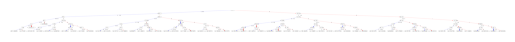

In [161]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(model)
# plt.figure(figsize=(100,100))
plt.show()

